# PyEmittance Tutorial

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyemittance import PyEmittance
import numpy as np

In [3]:
meas = PyEmittance()

In [4]:
meas.config_name

'LCLS_OTR2'

## Three options for setting configurations for measurements:
1. Make directory under `configs/` with Machine_Device_Name with all needed jsons (see `configs/LCLS2_OTR3`), and pass dir name to `meas.config_name`
2. Change params and configs through class attributes
3. pass the dictionary to pyemittance (same keys and subkeys as `meas.config_dict` below)

In [5]:
meas.num_points = 5

In [6]:
# see all configs with command below
meas.config_dict.keys()

dict_keys(['beamline_info', 'img_proc', 'meas_pv_info', 'opt_pv_info', 'save_scalar_pvs', 'savepaths'])

In [7]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 5,
 'background_im': None,
 'amp_threshold': 1500,
 'min_sigma': 1.0,
 'max_sigma': 60,
 'max_samples': 3,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

In [8]:
meas.quad_init

[-6, -4, -2, 0]

## Example running offline with random beam size numbers

Running offline.


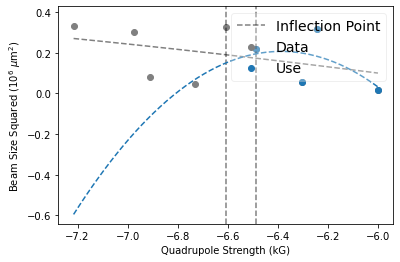

Not setting quad online values.
Savepaths not set. Please set them in 'configs/savepaths.json'
Using docs examples directory:  /Users/smiskov/Documents/SLAC/PyEmittance/docs/examples


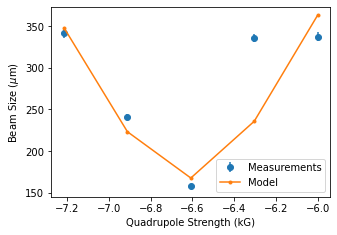

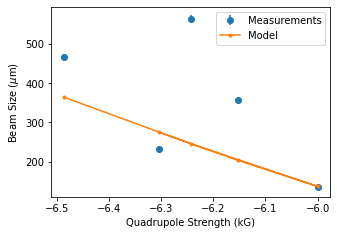

In [9]:
import matplotlib.pyplot as plt
res = meas.measure_emittance()

The output is a large dict:

In [10]:
res

## Example running online (do not run on machine!)

In [11]:
meas.online = True

In [12]:
try:
    res = meas.measure_emittance()
except:
    pass # epics can't connect on my local pc

Running online!
cannot connect to OTRS:IN20:541:RESOLUTION


## Example running with some random beamsize model 
### (can be any simulation, just need to pass pyemittance the beamsize fn)

In [13]:
def get_bs_model(*args):
    return abs(np.random.normal(1e-6, 5e-5)), abs(np.random.normal(1e-6, 5e-6)), 0, 0

get_bs_model()

(7.076821433635908e-05, 7.212657860364291e-06, 0, 0)

In [14]:
meas.use_model=True
meas.online = False # meaningless when running with a model
meas.get_bs_model = get_bs_model

Running offline.


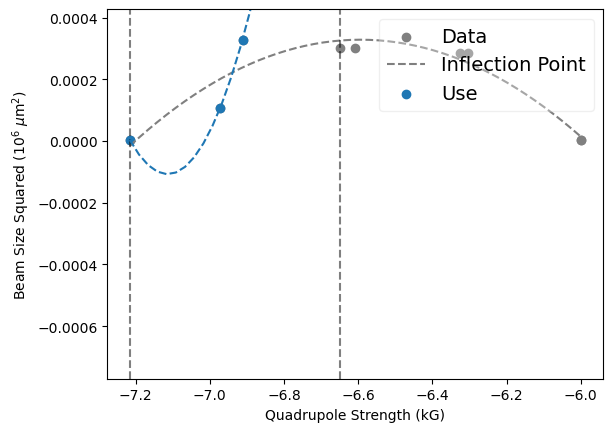

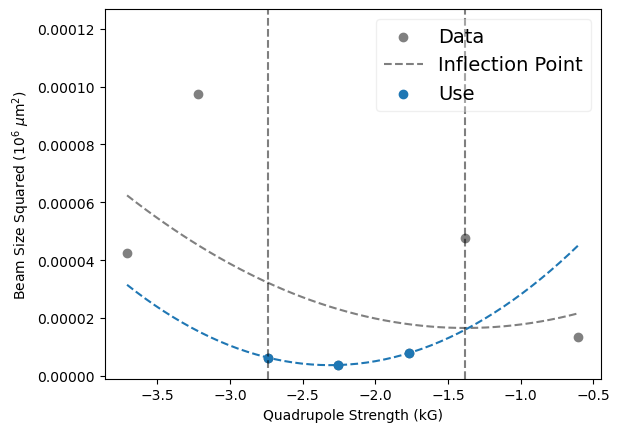

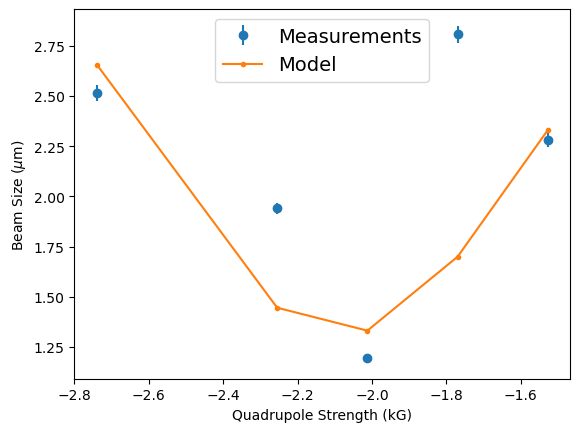

In [15]:
res = meas.measure_emittance()

In [16]:
res

{'quadvalsx': [-6.911851372866861,
  -7.215801830489149,
  -7.094221647440234,
  -6.9726414643913195,
  -6.851061281342405],
 'beamsizesx': [1.812658612484708e-05,
  1.8802258498890846e-06,
  1.982728447363326e-05,
  1.0278299048744332e-05,
  2.0036096455957464e-07],
 'beamsizeserrx': [2.718987918727062e-07,
  2.8203387748336267e-08,
  2.974092671044989e-07,
  1.5417448573116498e-07,
  3.0054144683936195e-09],
 'error_x': True,
 'quadvalsy': [-2.739525178532803,
  -2.2546999213050807,
  -2.0122872926912194,
  -1.7698746640773577,
  -1.5274620354634962],
 'beamsizesy': [2.5154832330463013e-06,
  1.940312453779633e-06,
  1.1926734028829483e-06,
  2.8076937700859555e-06,
  2.280590700635504e-06],
 'beamsizeserry': [3.7732248495694516e-08,
  2.9104686806694493e-08,
  1.7890101043244224e-08,
  4.211540655128933e-08,
  3.420886050953256e-08],
 'error_y': False,
 'emit_y': 3.785168210697337e-12,
 'norm_emit_y': 9.99988351739286e-10,
 'beta_y': 12.98818694150355,
 'alpha_y': 11.12992287825051,

# Older version emittance evaluation functions

In [17]:
from pyemittance.emit_eval_example import eval_emit_surrogate, eval_emit_machine

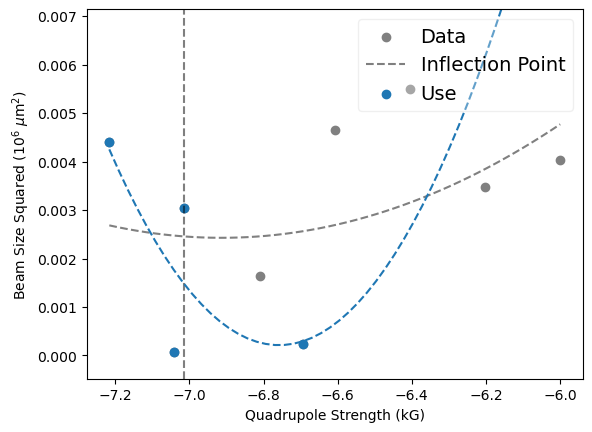

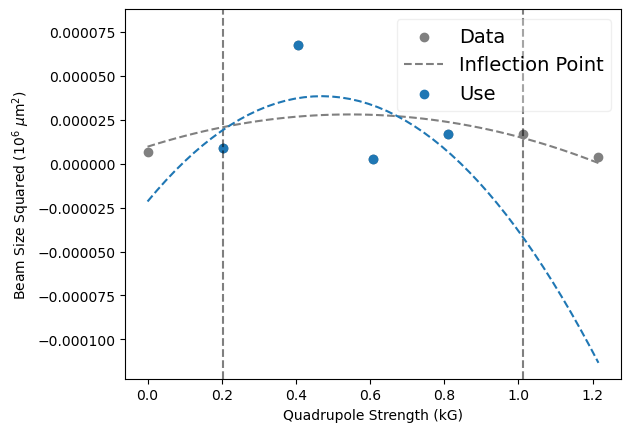

Savepaths not set. Please set them in 'configs/savepaths.json'
Using examples directory:  /Users/chrisonian/Code/GitHub/PyEmittance/examples


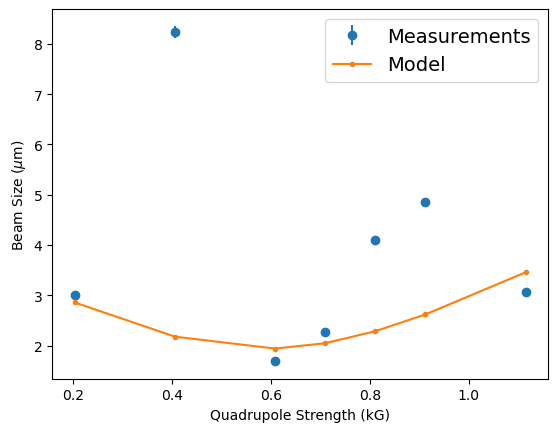

In [18]:
eval_emit_surrogate(
    get_bs_model, # need beamsize model for 'surrogate model'
    quad_init=[-6, -4, -2, 0],
    adapt_ranges=True,
    num_points=7,
    check_sym=True,
    infl_check=True,
    add_pnts=True,
    show_plots=True,
    add_noise=False,
    use_prev_meas=False,
    quad_tol=0.05,
    save_runs=False,
    calc_bmag=False,
);

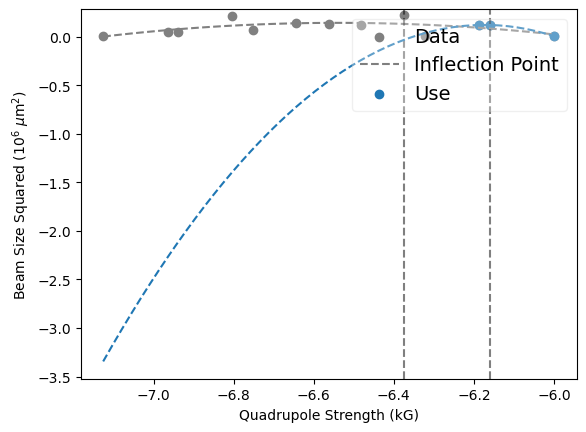

Savepaths not set. Please set them in 'configs/savepaths.json'
Using examples directory:  /Users/chrisonian/Code/GitHub/PyEmittance/examples


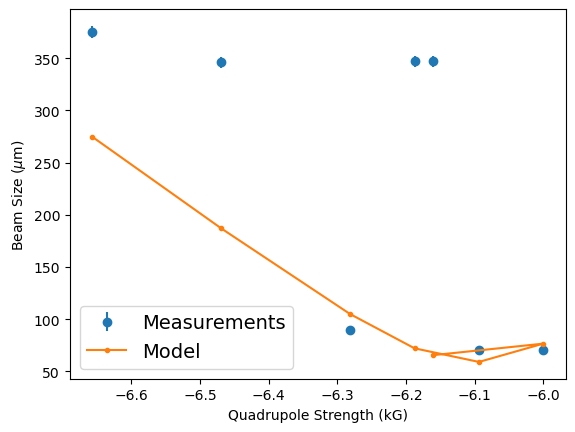

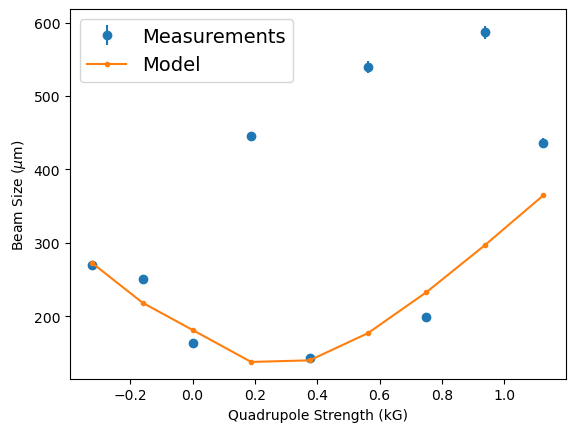

{'quadvalsx': [-6.160820156238168,
  -6.000000000000001,
  -6.093811757805598,
  -6.187623515611195,
  -6.2814352734167915,
  -6.4690587890279865,
  -6.65668230463918],
 'beamsizesx': [0.00034705515147869605,
  7.036097732522648e-05,
  7.022075020740293e-05,
  0.00034705515147869605,
  8.939014766213582e-05,
  0.0003459654319188217,
  0.000375245677555848],
 'beamsizeserrx': [5.20582727218044e-06,
  1.0554146598783971e-06,
  1.053311253111044e-06,
  5.20582727218044e-06,
  1.3408522149320374e-06,
  5.1894814787823255e-06,
  5.628685163337719e-06],
 'error_x': False,
 'emit_x': 1.4795038527969589e-08,
 'norm_emit_x': 3.619108341977718e-06,
 'beta_x': 39.046216267973314,
 'alpha_x': 66.24778459884547,
 'emit_x_err': 2.1963336520048683e-10,
 'norm_emit_x_err': 5.372591241793854e-08,
 'beta_x_rel_err': 0.01484506875293107,
 'alpha_x_rel_err': 1.0029355607163166e-17,
 'sigma_11': 5.776902740560981e-07,
 'sigma_12': -9.801385255325491e-07,
 'sigma_22': 1.6633314867005254e-06,
 'screen_sigma_

In [19]:
eval_emit_machine(
    quad_init=[-6, -4, -2, 0],
    online=False,
    config_name='FACET_nominal',
    meas_type='OTRS',
    adapt_ranges=True,
    num_points=7,
    check_sym=True,
    infl_check=True,
    add_pnts=True,
    show_plots=True,
    use_prev_meas=True,
    quad_tol=0.05,
    save_runs=False,
    calc_bmag=True,
)